In [4]:
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, threshold=50)

1. 首先确定训练数据，与对应标签：train_x, train_y
2. 定义二次函数模型：model(x, w1, w2, b)
3. 定义损失函数：loss_fn(predict, train_y)
4. 初始化参数，定义学习率和优化器：params, lr, optimizer([params], learning_rate)
5. 定义训练迭代循环：training_loop(n_epochs, params, train_x, train_y, optimizer)
6. 调用训练函数，得到最后参数
7. 在验证集上验证训练结果：validation_loss

In [60]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [6]:
t_un = 0.1 * t_u

In [7]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [51]:
train_t_un, val_t_un

(tensor([4.8400, 6.0400, 4.8900, 3.5700, 8.1900, 5.8200, 6.8400, 3.3900, 2.1800]),
 tensor([5.6300, 5.5900]))

In [8]:
def model(x, w1, w2, b):
    return w1 * x**2 + w2 * x + b

In [9]:
def loss_fn(p, y):
    squared_diffs = (p - y) ** 2
    return squared_diffs.mean()

In [47]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
lr = 1e-3
optimizer = optim.Adam([params], lr=lr)

In [44]:
def calc_forward(x, y, is_train):
    with torch.set_grad_enabled(is_train):
        p = model(x, *params)
        loss = loss_fn(p, y)
    return p, loss

In [45]:
def training_loop(n_epochs, optimizer, params, train_x, train_y, val_x, val_y):
    for epoch in range(1, n_epochs + 1):
        _, train_loss = calc_forward(train_x, train_y, is_train=True)

        _, val_loss = calc_forward(val_x, val_y, is_train=False)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(
                f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                f" Validation loss {val_loss.item():.4f}"
            )
    return params

In [48]:
params = training_loop(
    n_epochs=10000,
    optimizer=optimizer,
    params=params,
    train_x=train_t_un,
    val_x=val_t_un,
    train_y=train_t_c,
    val_y=val_t_c,
)

Epoch 1, Training loss 691.0059, Validation loss 607.3423
Epoch 2, Training loss 688.8969, Validation loss 605.4706
Epoch 3, Training loss 686.7914, Validation loss 603.6019
Epoch 500, Training loss 107.0706, Validation loss 89.0015
Epoch 1000, Training loss 14.3554, Validation loss 6.7972
Epoch 1500, Training loss 9.1922, Validation loss 2.5568
Epoch 2000, Training loss 8.6688, Validation loss 2.5316
Epoch 2500, Training loss 8.1028, Validation loss 2.5513
Epoch 3000, Training loss 7.4479, Validation loss 2.5826
Epoch 3500, Training loss 6.7247, Validation loss 2.6327
Epoch 4000, Training loss 5.9663, Validation loss 2.7082
Epoch 4500, Training loss 5.2158, Validation loss 2.8152
Epoch 5000, Training loss 4.5216, Validation loss 2.9573
Epoch 5500, Training loss 3.9281, Validation loss 3.1338
Epoch 6000, Training loss 3.4658, Validation loss 3.3367
Epoch 6500, Training loss 3.1434, Validation loss 3.5502
Epoch 7000, Training loss 2.9459, Validation loss 3.7521
Epoch 7500, Training loss

In [49]:
params

tensor([ 0.5420, -0.3498, -3.7877], requires_grad=True)

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
prediction = model(t_un, *params)
prediction.detach().numpy()

array([ 1.7815523, 11.539711 , 12.869709 , 29.181248 , 11.767799 ,
        7.7672844,  1.0795364, -2.9280634,  7.513688 , 14.183765 ,
       19.30734  ], dtype=float32)

In [39]:
x = np.sort(t_u.numpy())
x

array([21.8, 33.9, 35.7, 48.4, 48.9, 55.9, 56.3, 58.2, 60.4, 68.4, 81.9],
      dtype=float32)

In [53]:
prediction = model(torch.from_numpy(0.1 * x), *params).detach().numpy()
prediction

array([-1.9741642,  1.2558167,  1.8719289,  7.217106 ,  7.4633217,
       11.194899 , 11.424175 , 12.53693  , 13.874275 , 19.179651 ,
       29.705753 ], dtype=float32)

In [58]:
a = t_c.clone()
a

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [59]:
np.sort(a)
a

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [57]:
t_u.numpy(), t_c.numpy()

(array([21.8, 33.9, 35.7, 48.4, 48.9, 55.9, 56.3, 58.2, 60.4, 68.4, 81.9],
       dtype=float32),
 array([ 0.5, 14. , 15. , 28. , 11. ,  8. ,  3. , -4. ,  6. , 13. , 21. ],
       dtype=float32))

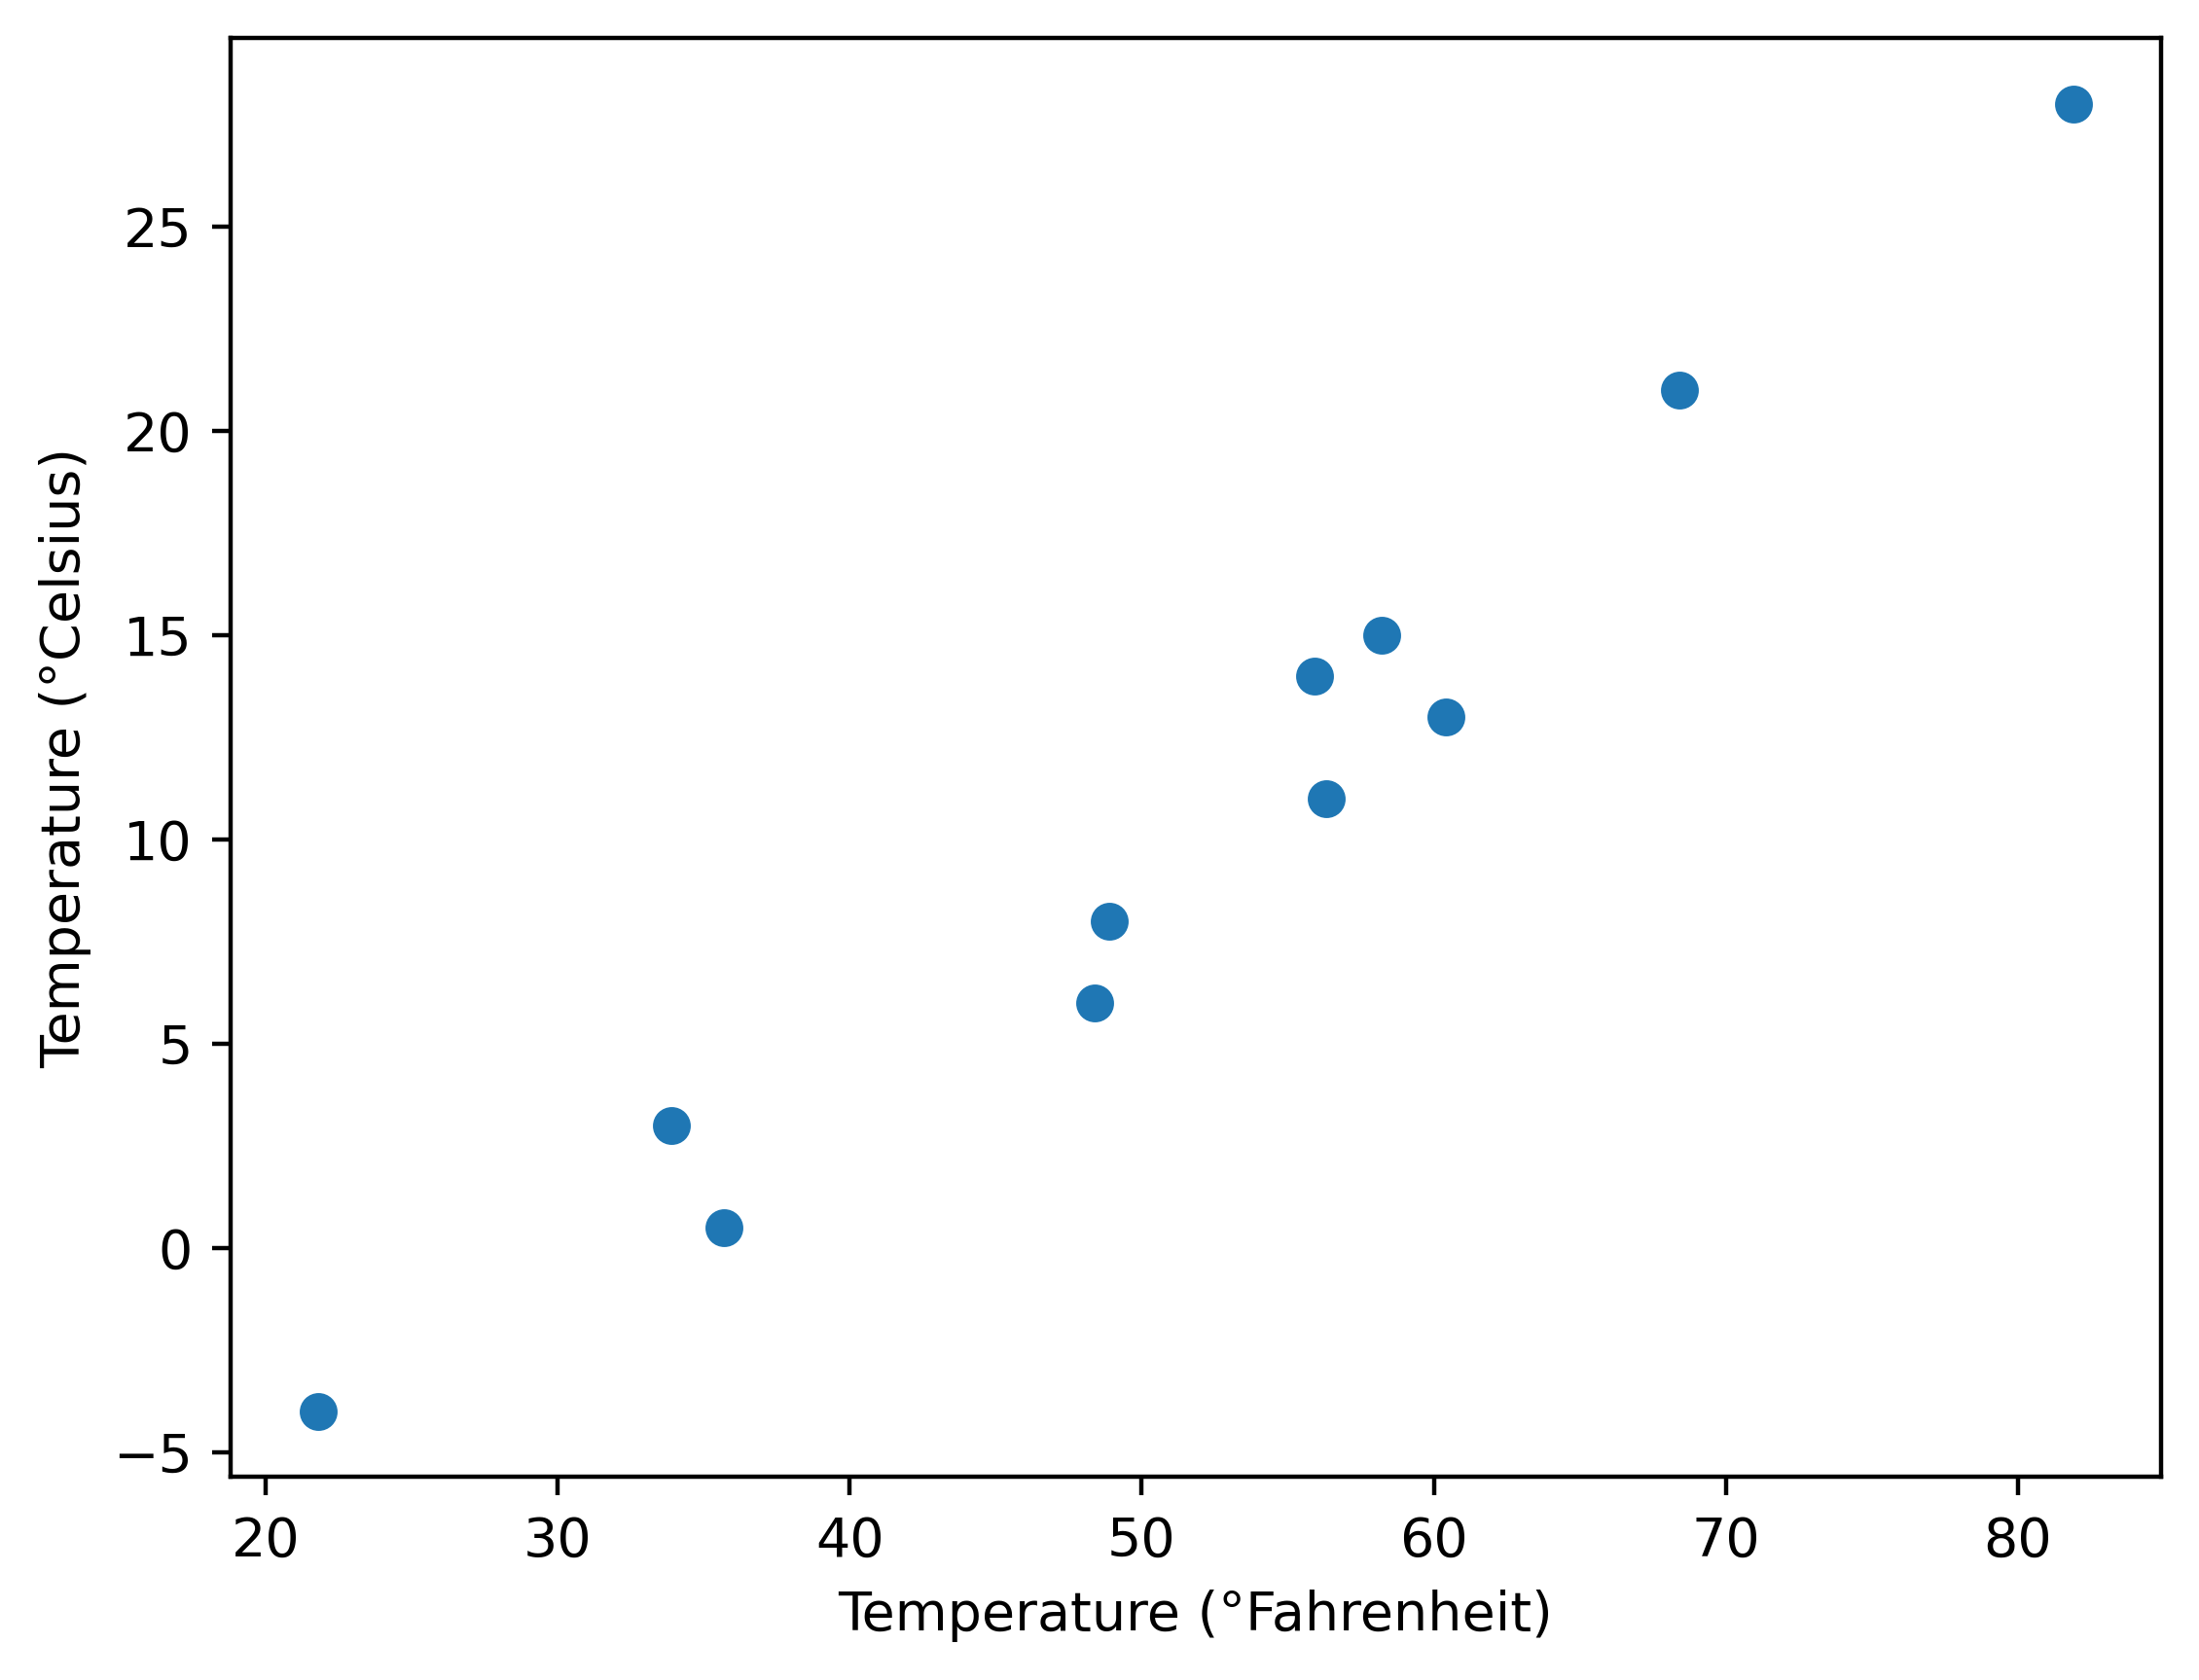

In [61]:
fig = plt.figure(dpi=400)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), "o")
plt.show()

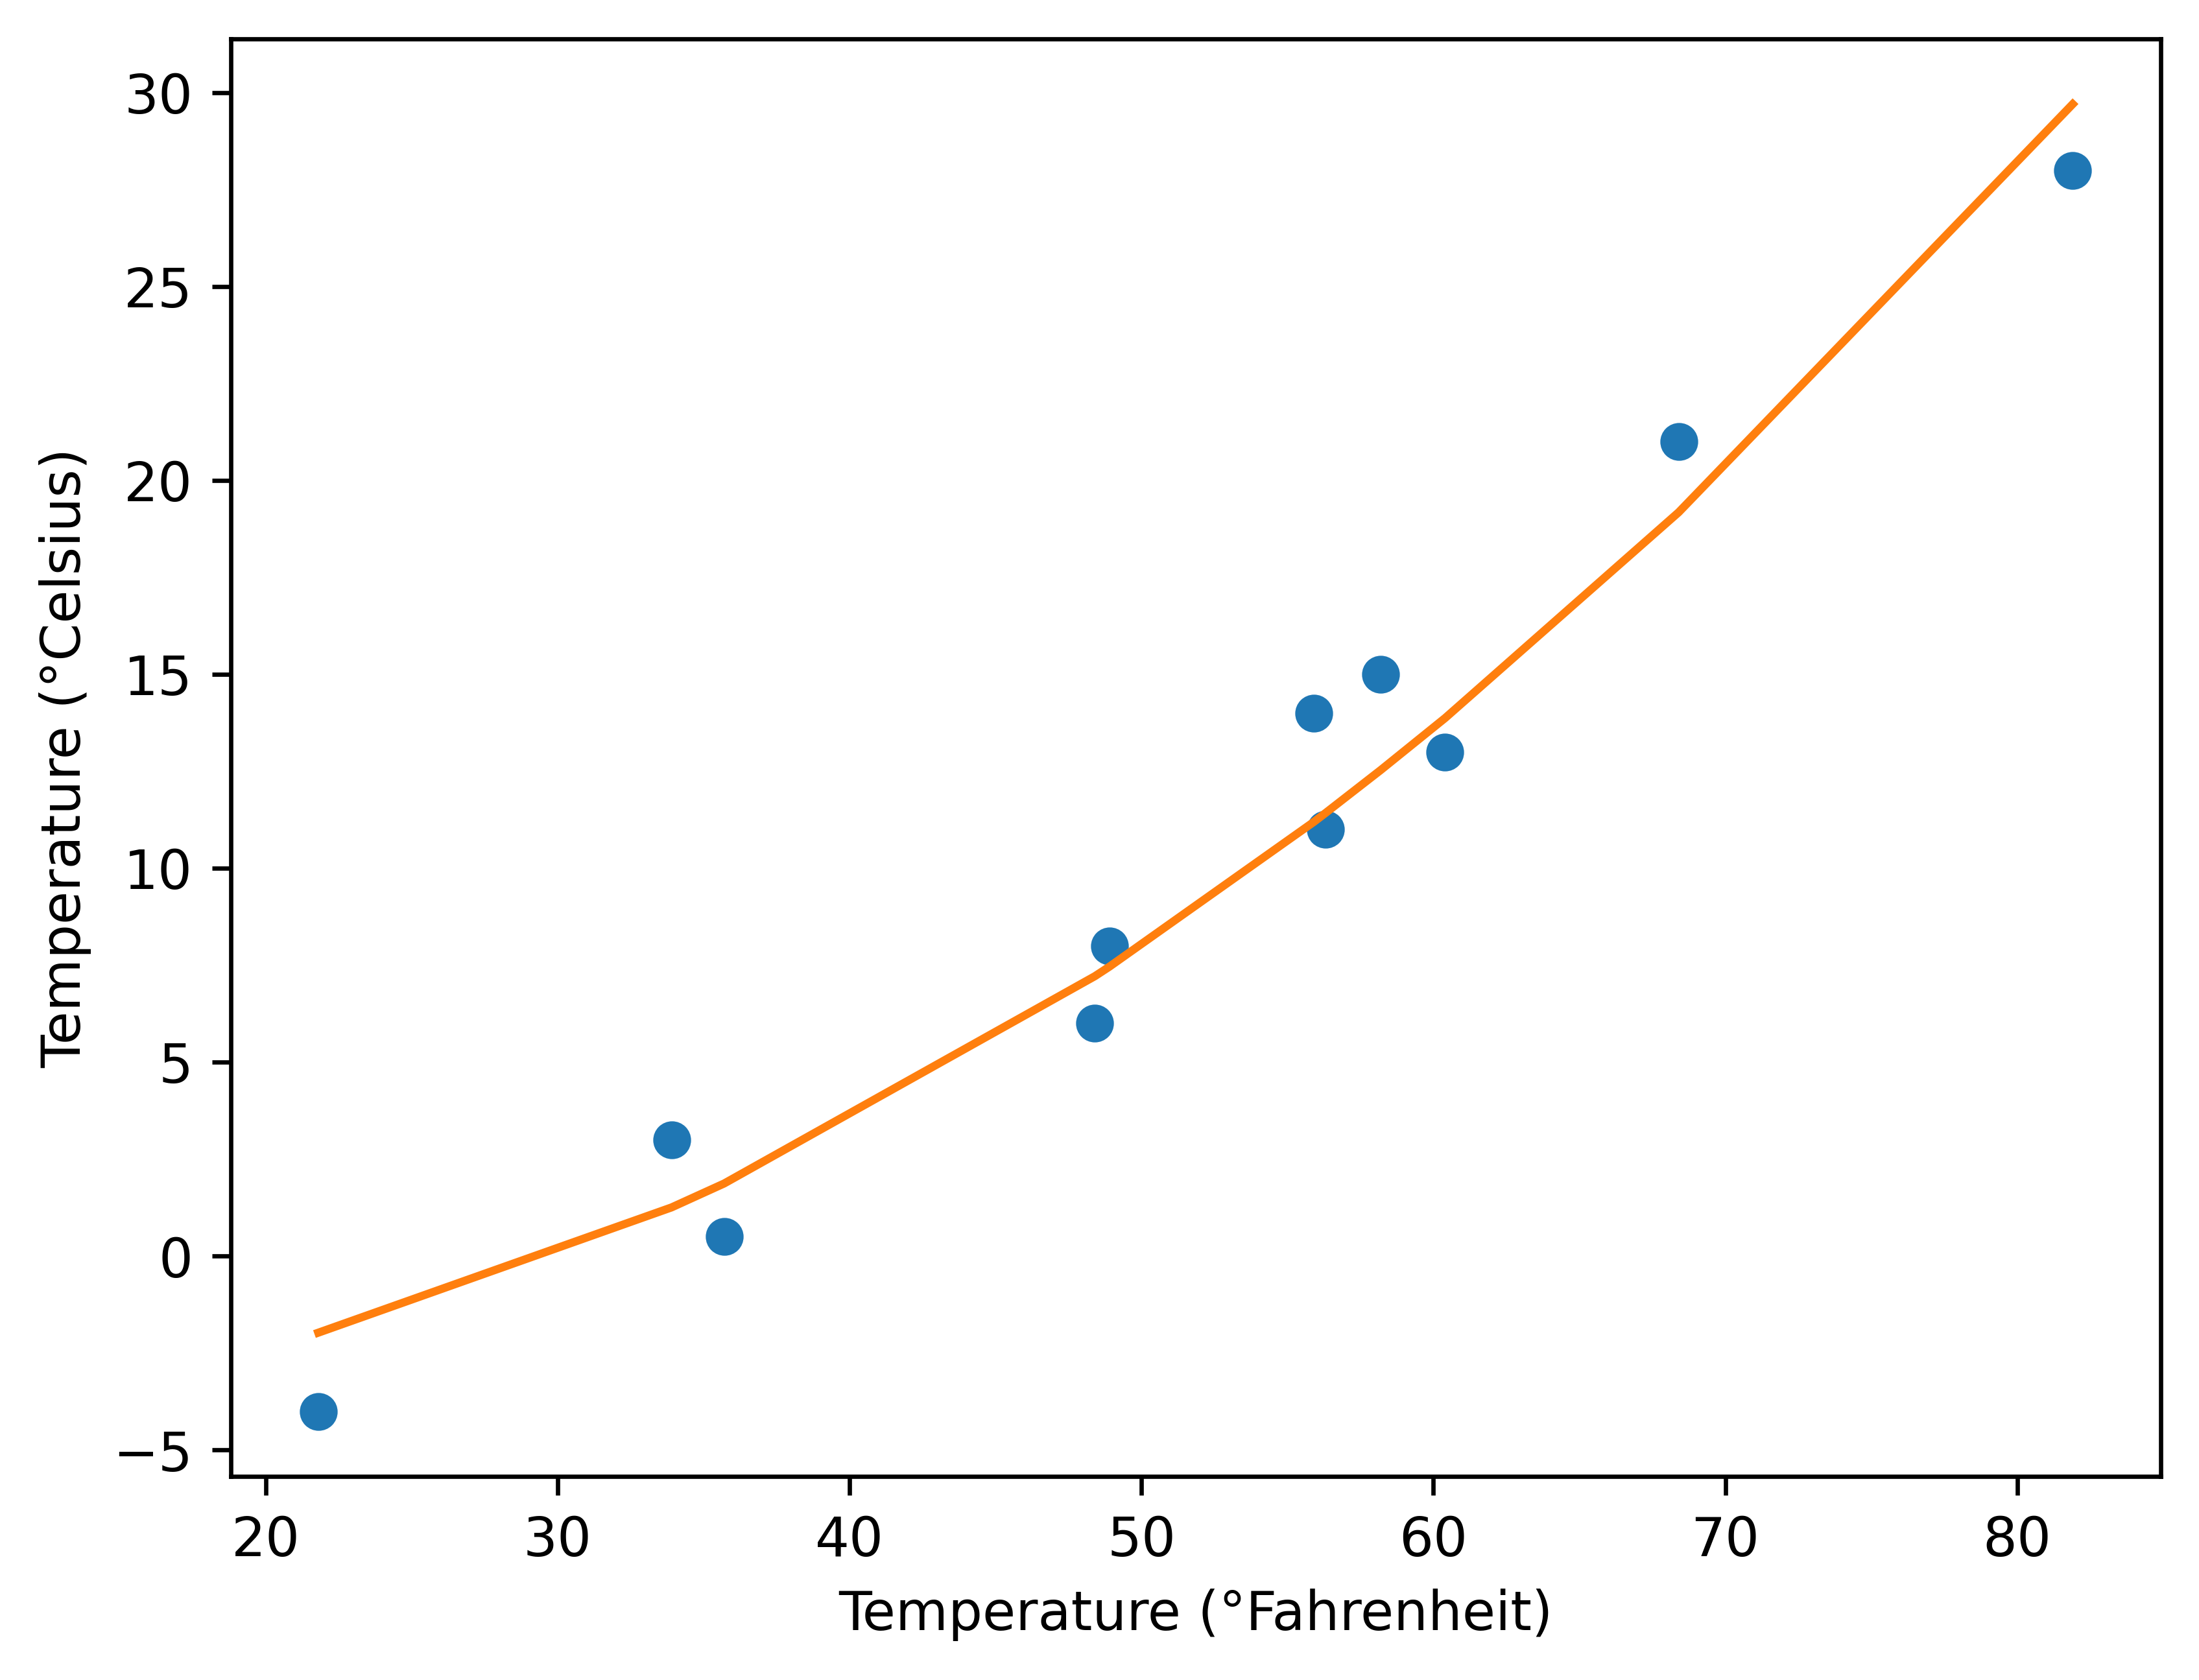

In [62]:
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), "o")
plt.plot(x, prediction)
plt.show()